SVM_algorithm

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
feature_df = pd.read_csv(r"C:\Users\AMRAN\OneDrive - Aalborg Universitet\8. semester\Projekt\ScrewingCell\Machine learning\Features\audio_features_clean.csv")
print(feature_df)

     chroma_stft  spec_contrast   tonnetz  spectral_bandwidth  \
0       0.561863      15.619273  0.007206         2417.964070   
1       0.562153      15.632684  0.010555         2418.219378   
2       0.561584      16.127217  0.005837         2428.743166   
3       0.565027      15.522475  0.005109         2408.660586   
4       0.573041      16.072910  0.001023         2439.570008   
..           ...            ...       ...                 ...   
314     0.569512      15.386268  0.023541         2519.115000   
315     0.597916      15.361099  0.011493         2560.293102   
316     0.573550      15.436929  0.021088         2508.978581   
317     0.571536      15.447922  0.020972         2516.797264   
318     0.575615      15.358622  0.022225         2527.347515   

     zero_crossing_rate  spectral_rolloff     mfcc_1     mfcc_2     mfcc_3  \
0              0.412022       7669.669824 -273.27160 -41.727802 -58.579470   
1              0.411119       7681.392346 -275.83853 -41.078020

In [4]:
# Assume that labels are in a separate dataframe
feature_df = feature_df.rename(columns={'Unnamed: 0': 'id'})
labels = pd.read_csv(r"C:\Users\AMRAN\OneDrive - Aalborg Universitet\8. semester\Projekt\CODE\Machine Learning\Data/Labels_names.csv")
labels = labels.rename(columns={'File Name': 'id'})

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder and transform the labels
labels['Label'] = encoder.fit_transform(labels['Label'])

# Print original labels and their encoded values
for original, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f'Original: {original}, Encoded: {encoded}')

# Merge features and labels
data = pd.merge(feature_df, labels, on='id')

print(data)

Original: N, Encoded: 0
Original: NS, Encoded: 1
Original: RS, Encoded: 2
Original: UT, Encoded: 3
     chroma_stft  spec_contrast   tonnetz  spectral_bandwidth  \
0       0.561863      15.619273  0.007206         2417.964070   
1       0.562153      15.632684  0.010555         2418.219378   
2       0.561584      16.127217  0.005837         2428.743166   
3       0.565027      15.522475  0.005109         2408.660586   
4       0.573041      16.072910  0.001023         2439.570008   
..           ...            ...       ...                 ...   
314     0.569512      15.386268  0.023541         2519.115000   
315     0.597916      15.361099  0.011493         2560.293102   
316     0.573550      15.436929  0.021088         2508.978581   
317     0.571536      15.447922  0.020972         2516.797264   
318     0.575615      15.358622  0.022225         2527.347515   

     zero_crossing_rate  spectral_rolloff     mfcc_1     mfcc_2     mfcc_3  \
0              0.412022       7669.669824 

In [5]:
nan_columns = data.isna().any()
nan_cols_list = data.columns[data.isna().any()].tolist()

print(nan_columns)
print(nan_cols_list)

chroma_stft           False
spec_contrast         False
tonnetz               False
spectral_bandwidth    False
zero_crossing_rate    False
spectral_rolloff      False
mfcc_1                False
mfcc_2                False
mfcc_3                False
mfcc_4                False
mfcc_5                False
mfcc_6                False
mfcc_7                False
mfcc_8                False
mfcc_9                False
mfcc_10               False
mfcc_11               False
mfcc_12               False
mfcc_13               False
mfcc_14               False
mfcc_15               False
mfcc_16               False
mfcc_17               False
mfcc_18               False
mfcc_19               False
mfcc_20               False
mfcc_21               False
mfcc_22               False
mfcc_23               False
mfcc_24               False
mfcc_25               False
mfcc_26               False
mfcc_27               False
mfcc_28               False
mfcc_29               False
mfcc_30             

In [6]:
# Drop filename column (we don't need it for the model)
data = data.drop(columns='id')

# Separate features and labels
X = data.drop(columns='Label')
y = data['Label']

In [7]:
#Scaling features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assume that data contains only features and no labels.
scaled_data = scaler.fit_transform(X)

# Convert the numpy array back into pandas dataframe
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

In [8]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4, random_state=42)

In [9]:
# Create a SVM model with a radial basis function (RBF) kernel
from sklearn import svm
#svm_model = SVC(kernel='rbf')
svm_model = svm.SVC(kernel='rbf', probability=True)
# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_s = svm_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_s))
print('Accuracy:', accuracy_score(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        69
           1       1.00      0.90      0.95        20
           2       0.00      0.00      0.00        13
           3       0.56      0.85      0.68        26

    accuracy                           0.78       128
   macro avg       0.61      0.65      0.62       128
weighted avg       0.73      0.78      0.75       128

Accuracy: 0.78125


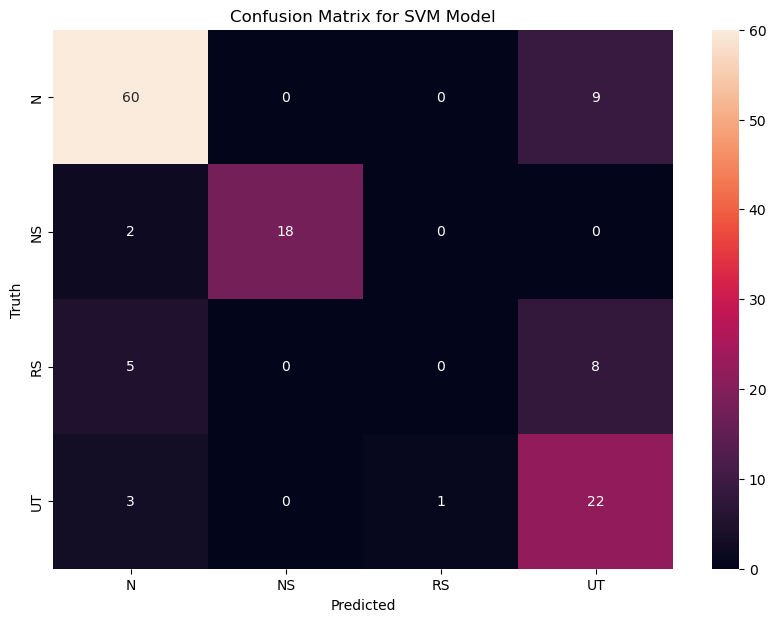

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_s = svm_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_s)

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM Model')

# Show the plot
plt.show()

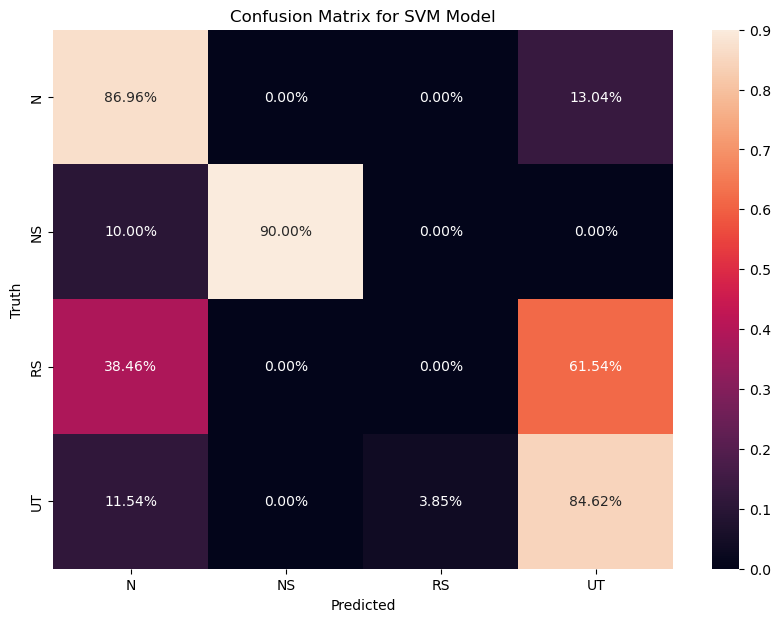

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred_s = svm_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_s)

# Convert confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='.2%', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM Model')

# Show the plot
plt.show()

# KNN algorithm

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
# Creating the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=4)

# Training the KNN classifier on the training data
knn.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_k = knn.predict(X_test)

# Evaluating the KNN classifier's performance
print(classification_report(y_test, y_pred_k))
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_k))



              precision    recall  f1-score   support

           0       0.82      0.88      0.85        69
           1       1.00      0.95      0.97        20
           2       0.25      0.08      0.12        13
           3       0.58      0.69      0.63        26

    accuracy                           0.77       128
   macro avg       0.66      0.65      0.64       128
weighted avg       0.74      0.77      0.75       128

Accuracy: 0.7734375


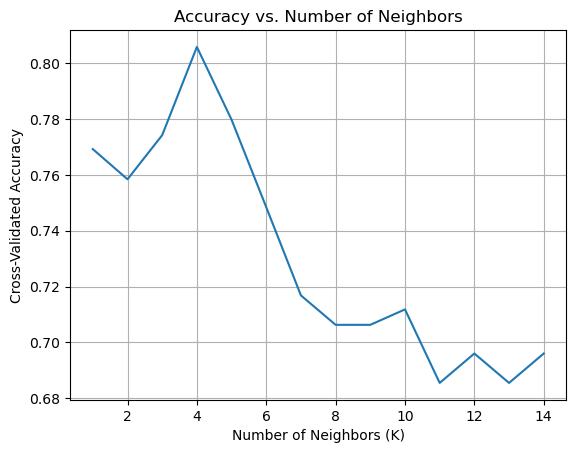

Best parameters:  {'n_neighbors': 4}
Best cross-validation score:  0.8057894736842105


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define the parameter values to be searched
k_range = list(range(1, 15))

# Create a parameter grid: map the parameter names to the values to be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# Extract mean cross-validation scores for each K value
mean_scores = grid.cv_results_['mean_test_score']

# Plot the scores
plt.figure()
plt.plot(k_range, mean_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

# Print the details
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

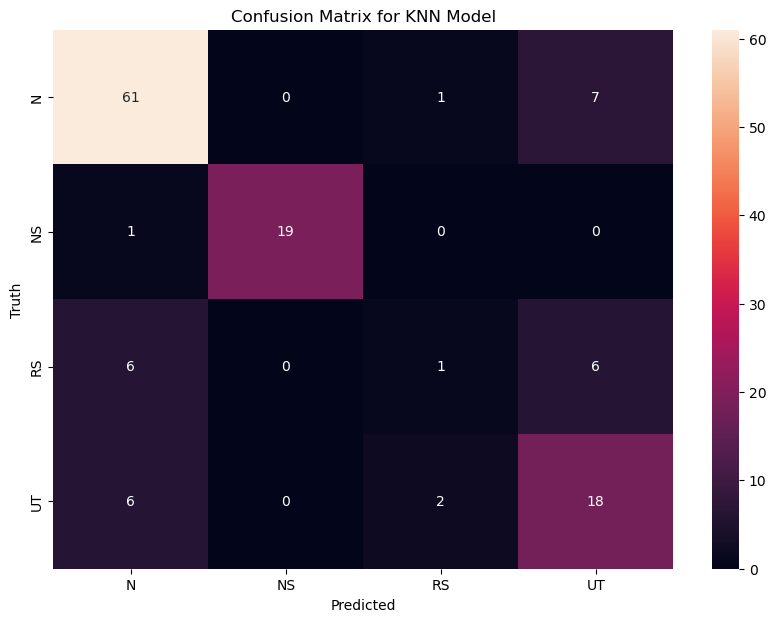

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_k = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_k)

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for KNN Model')

# Show the plot
plt.show()

# Random forrest

In [16]:
# Define the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Split data into training and test sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the model
model.fit(X_train_r, y_train_r)

# Make predictions on the test set
y_pred_r = model.predict(X_test_r)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_r, y_pred_r))


# Evaluate the model's performance
print(classification_report(y_test_r, y_pred_r))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        69
           1       1.00      0.70      0.82        20
           2       0.33      0.08      0.12        13
           3       0.59      0.77      0.67        26

    accuracy                           0.75       128
   macro avg       0.68      0.61      0.61       128
weighted avg       0.74      0.75      0.73       128



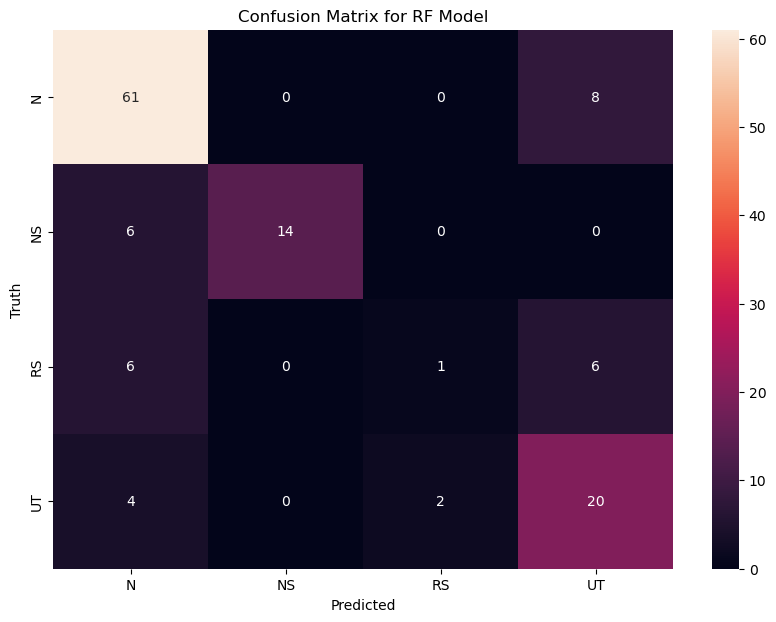

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_r = model.predict(X_test_r)

# Compute the confusion matrix
cm = confusion_matrix(y_test_r, y_pred_r)

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for RF Model')

# Show the plot
plt.show()

C:\Users\AMRAN\AppData\Local\Temp\ipykernel_15184\4125757465.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forest_importances[sorted_idx[:N]].plot(kind='barh', ax=ax)


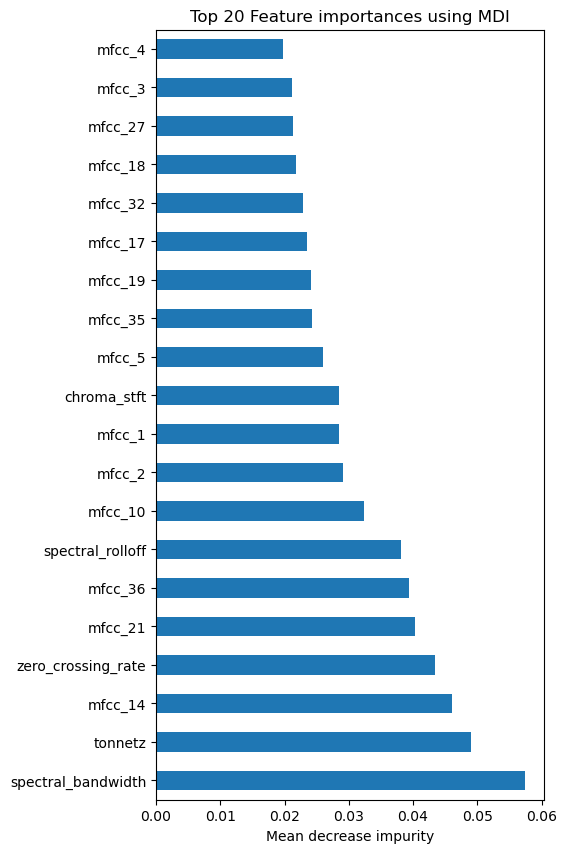

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assume rf_model is your trained RandomForestClassifier
importances = model.feature_importances_

# Get the names of the features from your dataframe
feature_names = X.columns

# Create arrays from feature importance and feature names
forest_importances = pd.Series(importances, index=feature_names)

# Define the number of most important features to plot
N = 20

# Sort the feature importances in decreasing order
sorted_idx = np.argsort(forest_importances)[::-1]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 10))

# Create a bar plot for the top N features
forest_importances[sorted_idx[:N]].plot(kind='barh', ax=ax)

# Set the labels
ax.set_title("Top 20 Feature importances using MDI")
ax.set_xlabel("Mean decrease impurity")

# Show the plot
plt.show()

# Making comparisons

KNN Accuracy: 0.7734375
KNN Precision: 0.7734375
KNN Recall: 0.7734375
KNN F1 Score: 0.7734375
SVM Accuracy: 0.78125
SVM Precision: 0.78125
SVM Recall: 0.78125
SVM F1 Score: 0.78125
RF Accuracy: 0.75
RF Precision: 0.75
RF Recall: 0.75
RF F1 Score: 0.75


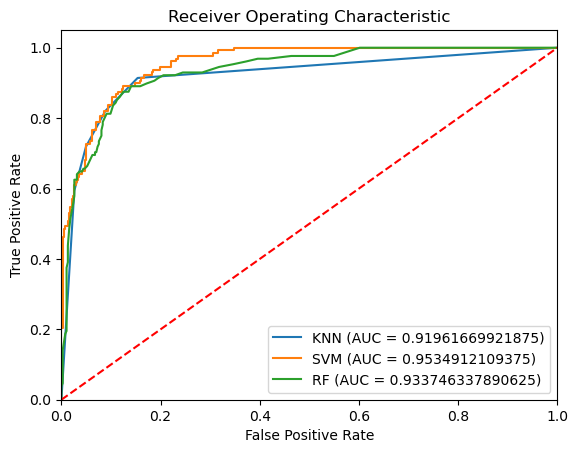

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

def evaluate_model(name, model, features, labels):
    predictions = model.predict(features)
    # Compute metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='micro')
    recall = recall_score(labels, predictions, average='micro')
    f1 = f1_score(labels, predictions, average='micro')

    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Precision: {precision}')
    print(f'{name} Recall: {recall}')
    print(f'{name} F1 Score: {f1}')
    
    # Compute ROC curve for each class
    n_classes = len(set(labels))
    y_test_bin = label_binarize(labels, classes=[*range(n_classes)])
    y_score = model.predict_proba(features)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr['micro'], tpr['micro'], label=f'{name} (AUC = {roc_auc["micro"]})')

# Assume that you've split your data into features and labels (ground truth), and that you've trained your models
# features_test, labels_test are the testing features and labels
# knn_model, svm_model, rf_model are your trained models

evaluate_model('KNN', knn, X_test, y_test)
evaluate_model('SVM', svm_model, X_test, y_test)
evaluate_model('RF', model, X_test_r, y_test_r)

# Plotting ROC curves
plt.plot([0, 1], [0, 1],'r--') # plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


KNN Accuracy: 0.7734375
KNN Precision: 0.7439465044681779
KNN Recall: 0.7734375
KNN F1 Score: 0.7523810683640405
SVM Accuracy: 0.78125
SVM Precision: 0.7328869047619048
SVM Recall: 0.78125
SVM F1 Score: 0.7509040136312002
RF Accuracy: 0.75
RF Precision: 0.7366389737713267
RF Recall: 0.75
RF F1 Score: 0.7272379360562718


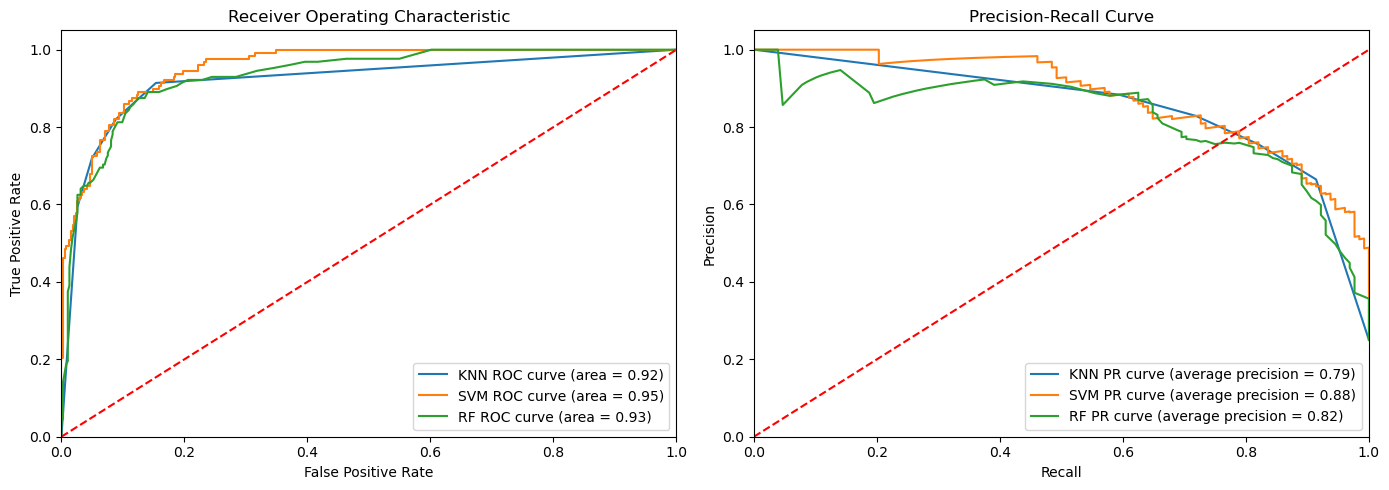

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def evaluate_model(name, model, features, labels, ax):
    predictions = model.predict(features)
    # Compute metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')

    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Precision: {precision}')
    print(f'{name} Recall: {recall}')
    print(f'{name} F1 Score: {f1}')
    
    # Compute ROC curve for each class
    n_classes = len(set(labels))
    y_test_bin = label_binarize(labels, classes=[*range(n_classes)])
    y_score = model.predict_proba(features)
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Compute micro-average Precision-Recall curve and area
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
    average_precision = average_precision_score(y_test_bin, y_score, average="micro")
    
    ax[0].plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:0.2f})')
    ax[1].plot(recall, precision, label=f'{name} PR curve (average precision = {average_precision:0.2f})')

    return ax

# Prepare the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Evaluate models
ax = evaluate_model('KNN', knn, X_test, y_test, ax)
ax = evaluate_model('SVM', svm_model, X_test, y_test, ax)
ax = evaluate_model('RF', model, X_test_r, y_test_r, ax)

# Add common configurations
for a in ax:
    a.plot([0, 1], [0, 1],'r--')
    a.set_xlim([0.0, 1.0])
    a.set_ylim([0.0, 1.05])
    a.legend(loc="lower right")

ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic')

ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [('KNN', KNeighborsClassifier()),
               ('SVM', SVC(probability=True)),
               ('RF', RandomForestClassifier())]

# Define meta learner model
meta_model = LogisticRegression()

# Define the stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model on our data
stacking_model.fit(X_train, y_train)

# Evaluate the model
y_pred = stacking_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       162
           1       0.95      0.83      0.89        65
           2       0.78      0.80      0.79       125
           3       0.79      0.72      0.76        58
           4       0.91      0.83      0.87       127

    accuracy                           0.83       537
   macro avg       0.84      0.82      0.83       537
weighted avg       0.84      0.83      0.83       537

